In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
from cv2 import cvtColor,COLOR_HLS2RGB
from downloader import download_video
import display as d

In [3]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
reload(v)
df= v.get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')
fps = df.attrs['fps']

In [5]:
df.head()

hue  lightness  saturation
frame y x                            
0     0 0    0         36           0
        1    0         34           0
        2    0         32           0
        3    0         31           0
        4    0         31           0

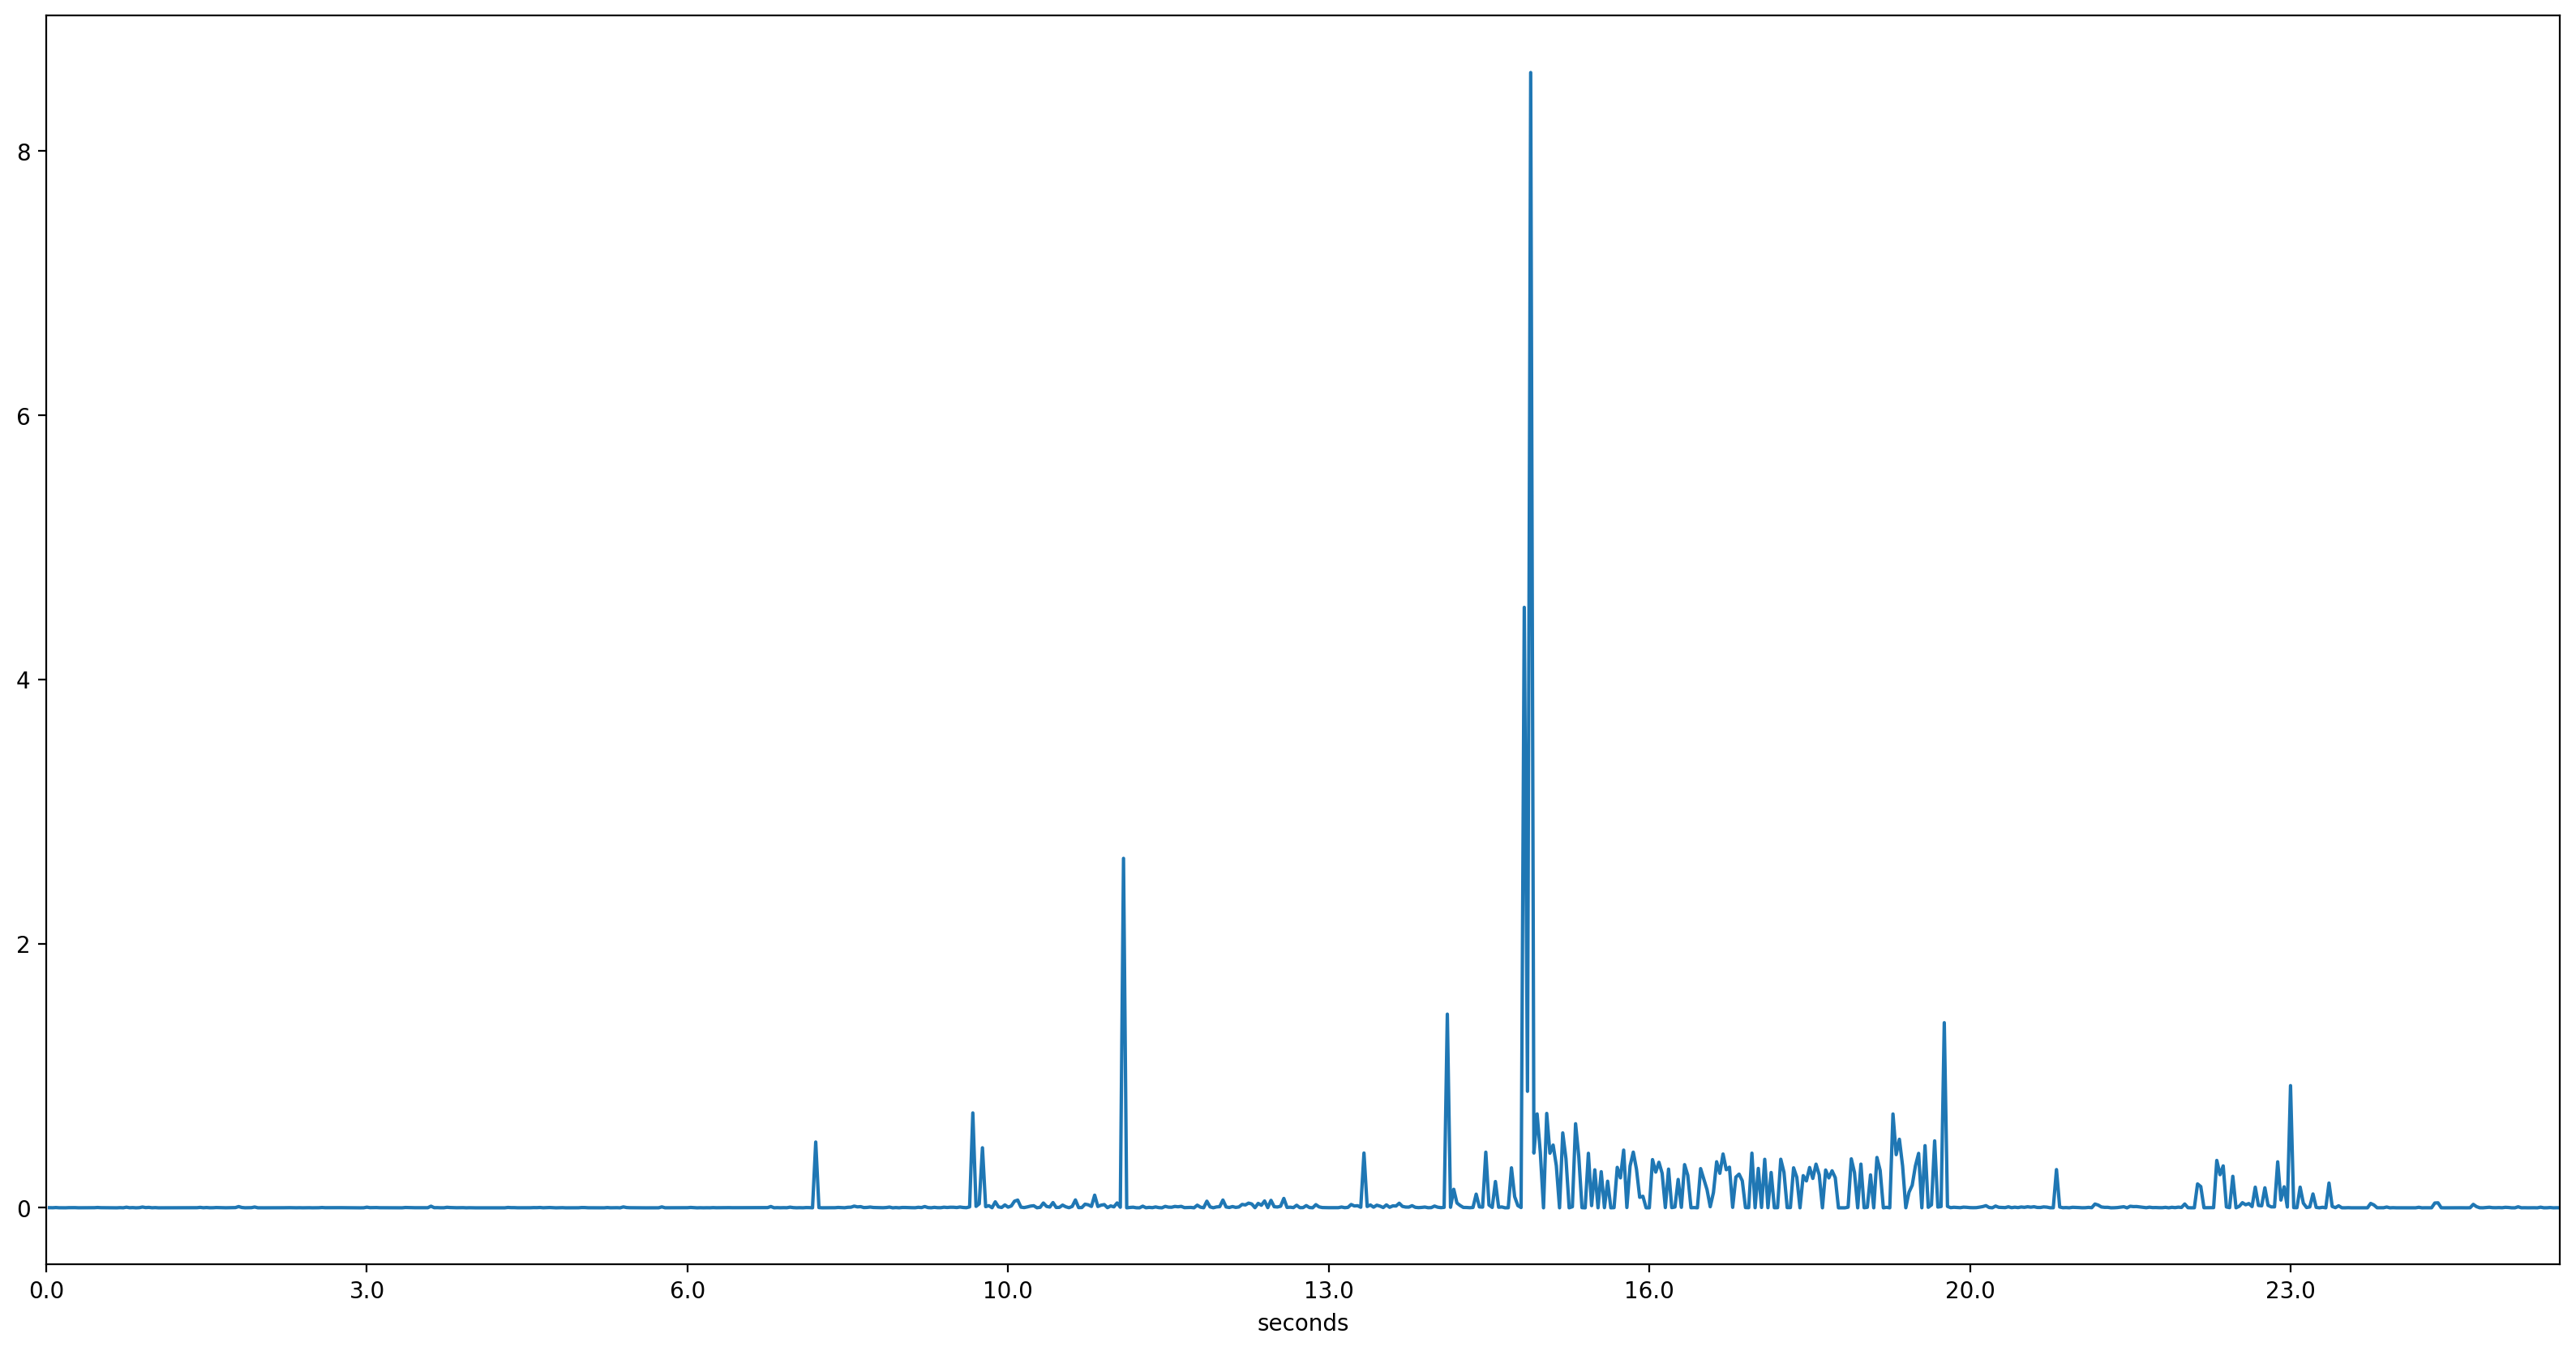

In [40]:
plt.figure(figsize=(20,10))
val = df.groupby('frame').hue.mean().pct_change(1).abs().plot.line()
val.set_xlim((0,df.index.get_level_values(0).max()))

val.set_xticklabels(val.get_xticks() // fps)
val.set_xlabel('seconds')
plt.show()

In [7]:
df.attrs['fps'] = 30

700 200 100 100


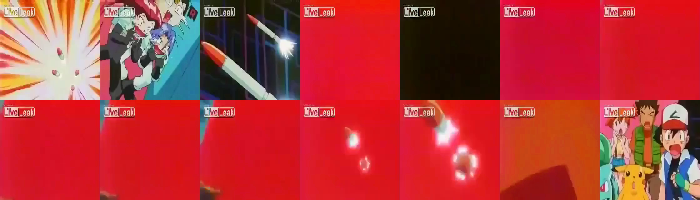

In [48]:
reload(d)
pct_change = df.groupby('frame').hue.mean().pct_change(1).abs()
pct_change = pct_change[pct_change > .5].index
d.show_frame(df,pct_change,width=7)
